In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [4]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.to_datetime(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [5]:
# Number of entries by Column
bb100.count()

url                       327895
WeekID                    327895
Week Position             327895
Song                      327895
Performer                 327895
SongID                    327895
Instance                  327895
Previous Week Position    295941
Peak Position             327895
Weeks on Chart            327895
dtype: int64

In [6]:
#Null Values by Column
bb100.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64

In [7]:
#Number of UNIQUE values by Column
bb100.apply(pd.Series.nunique)

url                        3279
WeekID                     3279
Week Position               100
Song                      24360
Performer                 10061
SongID                    29389
Instance                     10
Previous Week Position      100
Peak Position               100
Weeks on Chart               87
dtype: int64

In [8]:
#Billboard Top #1 By Week from 1958 to 2021
bb1 = bb100[bb100['Week Position']==1].copy()

In [9]:
#First and Last Weekly #1
bb1['WeekID'] = pd.to_datetime(bb1['WeekID']).copy()
bb1.sort_values(by='WeekID').iloc[np.r_[0:1, -1:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
944,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
3522,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,1,Good 4 U,Olivia Rodrigo,Good 4 UOlivia Rodrigo,1,NaN,1,1


In [10]:
#Most times ranked #1
Num_One_Songs = bb1['SongID'].value_counts().rename('Count').to_frame().reset_index()
Num_One_Songs = Num_One_Songs.rename(columns = {'index':'SongID'})
Num_One_Songs.iloc[np.r_[0:15, -5:0]]

,SongID,Count
0,Old Town RoadLil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet DayMariah Carey & Boyz II Men,16
2,DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,I Gotta FeelingThe Black Eyed Peas,14
4,We Belong TogetherMariah Carey,14
5,Candle In The Wind 1997/Something About The Way You Look TonightElton John,14
6,Macarena (Bayside Boys Mix)Los Del Rio,14
7,I'll Make Love To YouBoyz II Men,14
8,I Will Always Love YouWhitney Houston,14
9,Uptown Funk!Mark Ronson Featuring Bruno Mars,14


In [11]:
#bb1[bb1['Performer']=='Ed Sheeran']

In [12]:
#Num_One_Songs with Features Dataframe: 
Num_One_Features = pd.merge(Num_One_Songs, features, on='SongID', how='left')

In [14]:
Num_One_Genres = Num_One_Features['spotify_genre'].replace('[]', np.nan).value_counts().rename('Count').to_frame().reset_index()
Num_One_Genres = Num_One_Genres.rename(columns = {'index':'spotify_genre'})
Num_One_Genres

,spotify_genre,Count
0,"['dance pop', 'pop', 'post-teen pop']",23
1,"['british invasion', 'merseybeat', 'psychedelic rock', 'rock']",19
2,"['dance pop', 'pop', 'r&b', 'urban contemporary']",18
3,"['dance pop', 'pop']",18
4,"['dance pop', 'hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary']",11
...,...,...
520,"['electro', 'freestyle', 'funk', 'new jack swing', 'quiet storm']",1
521,"['rhythm and blues', 'rock-and-roll']",1
522,"['classic country pop', 'country', 'country rock', 'mellow gold', 'soft rock']",1
523,['chicago rap'],1


In [15]:
Num_One_Genres_Top_10 = Num_One_Features['spotify_genre'].replace('[]', np.nan).value_counts()[:10].rename('Count').to_frame()
#Num_One_Genres_Top_20 = Num_One_Genres_Top_20.rename(columns = {'index':'spotify_genre'})
Num_One_Genres_Top_10

,Count
"['dance pop', 'pop', 'post-teen pop']",23
"['british invasion', 'merseybeat', 'psychedelic rock', 'rock']",19
"['dance pop', 'pop', 'r&b', 'urban contemporary']",18
"['dance pop', 'pop']",18
"['dance pop', 'hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary']",11
"['dance pop', 'pop', 'r&b']",11
"['barbadian pop', 'dance pop', 'pop', 'post-teen pop', 'r&b', 'urban contemporary']",11
"['dance pop', 'pop', 'pop rap']",11
"['pop', 'r&b', 'soul']",11
"['adult standards', 'brill building pop', 'classic girl group', 'disco', 'funk', 'motown', 'quiet storm', 'soul']",10


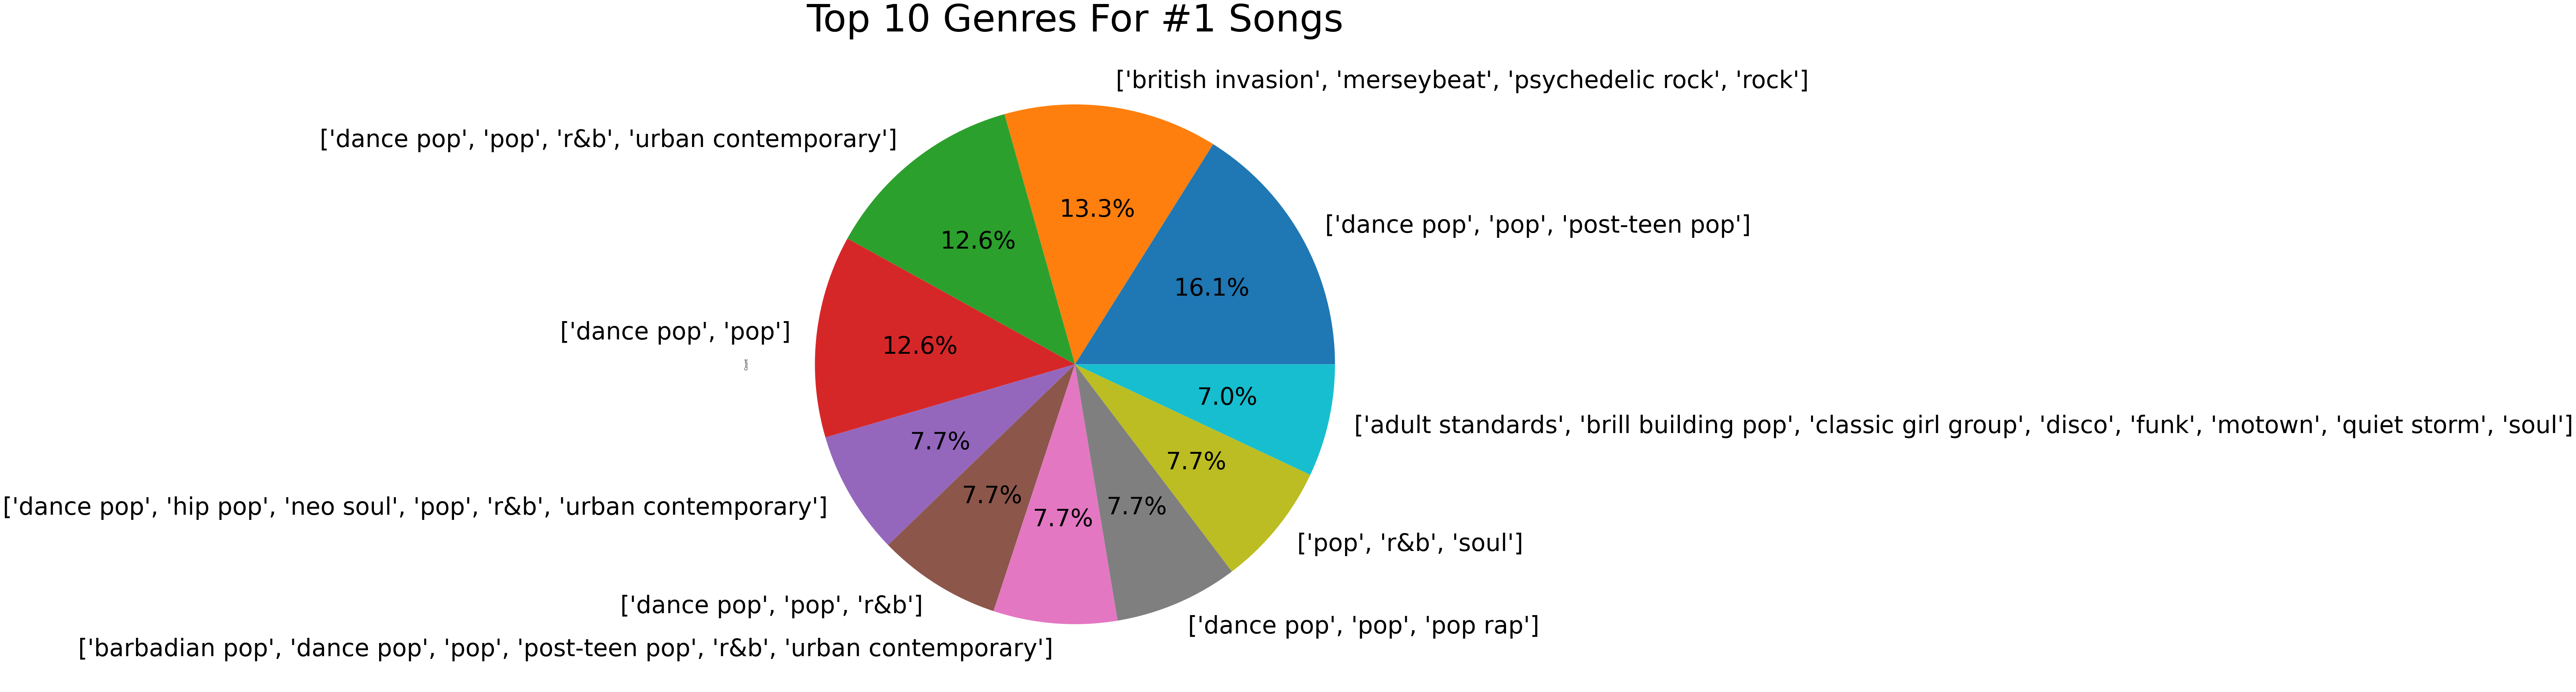

In [16]:
Num_One_Genres_Top_10.plot.pie(y='Count', autopct='%1.1f%%', 
                               legend=None, figsize=(30,30), 
                               textprops={'fontsize':60})

plt.title('Top 10 Genres For #1 Songs', fontsize=95);